In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/advertising.csv")

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

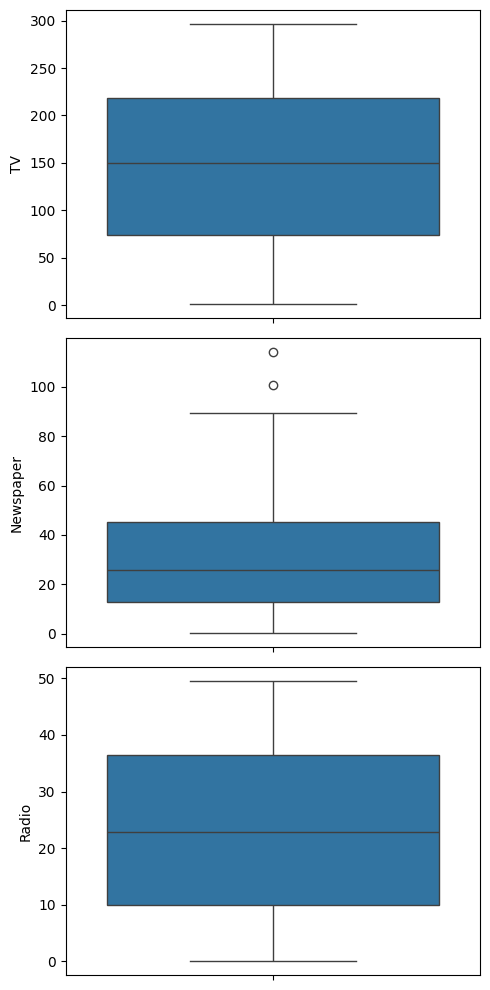

In [20]:
fig, axs = plt.subplots(3, figsize = (5,10))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

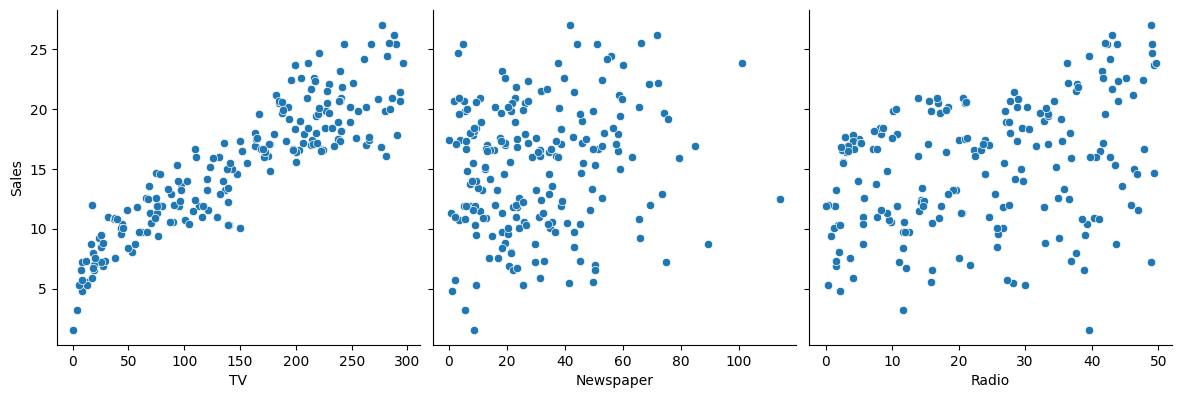

In [21]:
sns.pairplot(data=df, x_vars=["TV", "Newspaper", "Radio"], y_vars="Sales", height=4, aspect=1, kind="scatter")
plt.show()

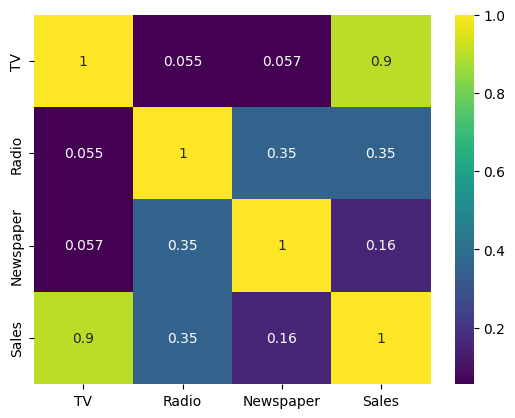

In [22]:
sns.heatmap(df.corr(), cmap="viridis", annot=True)
plt.show()

In [50]:
X = df["TV"]
y = df["Sales"]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [52]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [53]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [55]:
import statsmodels.api as sm

In [56]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [57]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [61]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           1.52e-52
Time:                        16:40:06   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

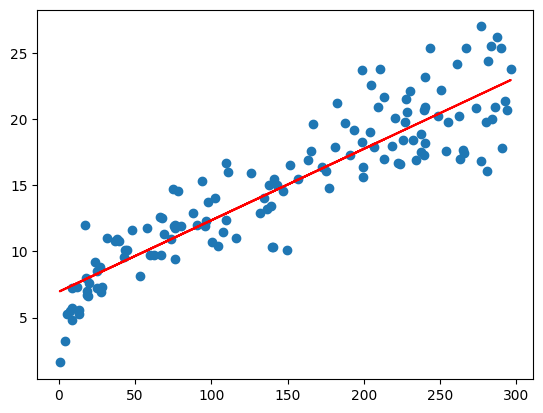

In [64]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054 * X_train, "red")
plt.show()

In [73]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

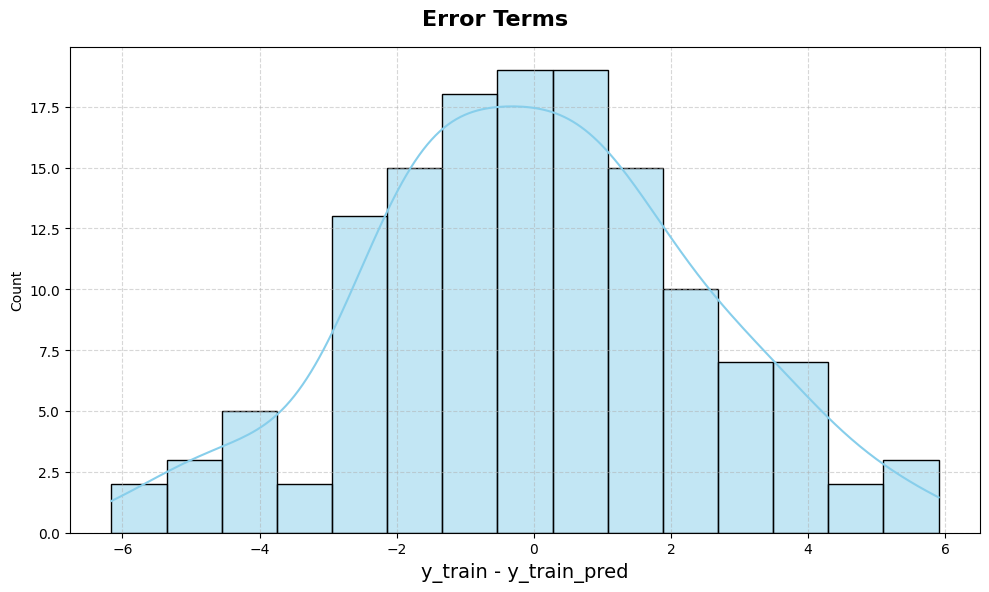

In [74]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(res, bins=15, kde=True, color="skyblue", edgecolor="black")

fig.suptitle('Error Terms', fontsize=16, fontweight='bold')
plt.xlabel('y_train - y_train_pred', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

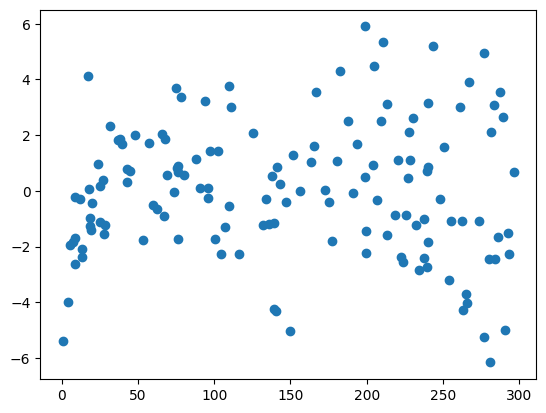

In [75]:
plt.scatter(X_train,res)
plt.show()

In [76]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [80]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(2.019296008966232)

In [81]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

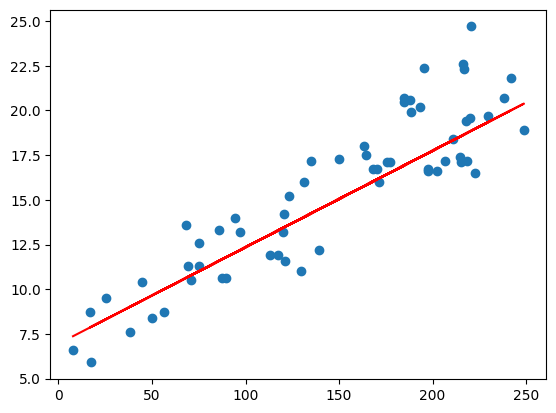

In [82]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()